# Basics of network analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")


import sys
import matplotlib.pyplot as plt
from collections import Counter
from os import listdir
import networkx as nx

sys.path.append('../')
from src.utils import *

np.set_printoptions(legacy='1.25')

## Load the graph

In [2]:
directory = '../Data/'
names = listdir(directory)
print(f'The available names are: {names}')

The available names are: ['fb.edges', 'SFHH.edges', 'rt.edges', 'citation.edges', 'SP', 'power.edges']


In [3]:
filename = 'fb.edges'

# load the graph
A = load_graph(filename, directory, symmetric = True, weighted = False)

# size
n, _ = A.shape
print(f'Size: {n}')

Size: 63731


## Degree

In [6]:
D

{26.0: 554,
 34.0: 373,
 10.0: 1377,
 33.0: 403,
 30.0: 446,
 12.0: 1228,
 243.0: 4,
 3.0: 3888,
 19.0: 768,
 43.0: 278,
 309.0: 2,
 161.0: 16,
 37.0: 353,
 29.0: 494,
 32.0: 422,
 31.0: 445,
 27.0: 569,
 41.0: 306,
 765.0: 1,
 82.0: 100,
 24.0: 597,
 50.0: 239,
 8.0: 1784,
 5.0: 2697,
 21.0: 675,
 11.0: 1326,
 42.0: 297,
 83.0: 104,
 72.0: 114,
 20.0: 700,
 79.0: 109,
 108.0: 62,
 17.0: 845,
 4.0: 3217,
 15.0: 1009,
 126.0: 38,
 38.0: 337,
 1.0: 8098,
 13.0: 1212,
 2.0: 5115,
 14.0: 1038,
 55.0: 199,
 106.0: 64,
 45.0: 278,
 68.0: 144,
 122.0: 40,
 46.0: 301,
 18.0: 804,
 7.0: 1884,
 28.0: 494,
 113.0: 69,
 121.0: 41,
 552.0: 1,
 326.0: 2,
 74.0: 133,
 48.0: 272,
 107.0: 63,
 62.0: 166,
 63.0: 159,
 52.0: 210,
 73.0: 128,
 212.0: 7,
 70.0: 142,
 75.0: 124,
 81.0: 122,
 90.0: 68,
 78.0: 98,
 22.0: 664,
 64.0: 168,
 66.0: 169,
 124.0: 42,
 171.0: 17,
 91.0: 83,
 133.0: 28,
 95.0: 75,
 129.0: 27,
 115.0: 42,
 139.0: 31,
 49.0: 233,
 25.0: 571,
 98.0: 64,
 131.0: 40,
 36.0: 373,
 40.0: 37

Average degree: 25.641838351822503
Graph density (delta): 0.0004023448298602329




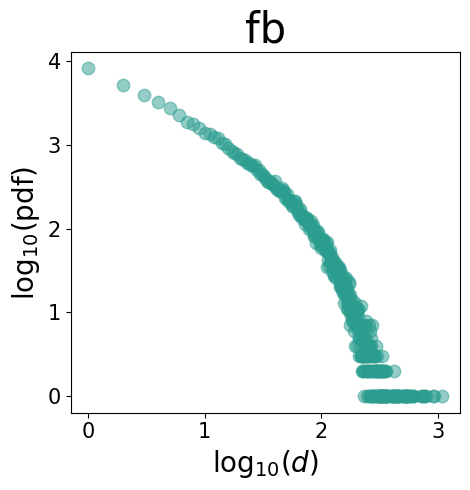

In [4]:
# degree vector
d = A@np.ones(n)

# average degree and density
d_avg = np.mean(d)
delta = d_avg/n

print(f'Average degree: {d_avg}')
print(f'Graph density (delta): {delta}\n\n')


# plot the degree distribution
D = dict(Counter(d))
x = np.array(list(D.keys()))
y = np.array(list(D.values()))


fig, ax = plt.subplots(1, 1, figsize = (5, 5))

ax.scatter(np.log10(x),np.log10(y), color = '#2a9d8f', alpha = 0.5, s = 80)
ax.set_title(filename.split('.')[0], fontsize = 30)
ax.set_xlabel(r'${\rm log}_{10}(d)$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.set_ylabel(r'${\rm log}_{10}({\rm pdf})$', fontsize = 20)
plt.tight_layout()
plt.show();

## Connected components, shortest paths, and diameter

In [5]:
# create a NetworkX graph from the adjacency matrix
g = nx.from_scipy_sparse_array(A)

In [6]:
# find the largest connected component
largest_cc = max(nx.connected_components(g), key = len)
largest_cc_ = list(largest_cc)

In [7]:
# compute the shortest path between 1000 randomly selected pairs of source and target in the largest connected component

L = []
n_samples = 1000

for i in range(n_samples):
    print(f'{np.round(100*(i+1)/n_samples)} %', end = '\r')

    source, target = np.random.choice(largest_cc_, 2, replace = False)
    L.append(len(nx.shortest_path(g, source, target)))

In [8]:
np.mean(L), np.log(len(largest_cc_))

(5.375, 11.057092949498278)

In [9]:
assortativity = nx.degree_assortativity_coefficient(g)
print(f'Degree assortativity: {assortativity}')

Degree assortativity: 0.17692237798382482
